In [17]:
### Import packages
import pandas as pd
import numpy as np
import seaborn as sns  # Seaborn is a library for making statistical graphics in Python. 
# It is built on top of matplotlib and closely integrated with pandas data structures.
from sklearn import tree
from sklearn import metrics

In [3]:
#load the csv file
train_data = pd.read_csv('train_data_after_preprocess.csv')
test_data = pd.read_csv('test_data_after_preprocess.csv')

In [4]:
train_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,-0.645275,0.45035,-1.728912,4.961712,-0.420772,0
1,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.538652,0.45035,0.762074,-0.173538,-0.420772,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,-0.369329,0.45035,-0.972209,2.939376,-0.420772,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,-0.077591,0.45035,-1.019112,-0.802554,-0.420772,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,-0.393144,0.45035,0.429922,-0.173538,-0.420772,1


In [5]:
test_data.head()

,housing,loan,default,age_1,age_2,age_3,marital_married,marital_single,job_blue-collar,job_entrepreneur,...,education_tertiary,contact_telephone,poutcome_other,poutcome_success,balance_log,pdays_log,duration_log,campaign_log,previous_log,y
0,1,0,0,0,1,0,1,0,0,0,...,1,1,0,0,-0.353943,0.46161,0.033731,-0.811596,-0.435061,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,3.367438,0.46161,-0.425208,-0.170094,-0.435061,0
2,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,-0.112356,0.46161,-0.002151,-0.811596,-0.435061,0
3,0,0,0,0,0,1,1,0,1,0,...,0,1,0,0,0.064959,0.46161,-1.512344,0.322148,-0.435061,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1.839344,0.46161,2.413680,-0.170094,-0.435061,1


In [6]:
#creating X,Y train and test data
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

In [7]:
y_train.head()

0    0
1    0
2    0
3    0
4    1
Name: y, dtype: int64

In [8]:
### Checking Training Data and Testing Data dimensions
count_train = np.unique(y_train, return_counts=True)  # np.unique: numpy, find the unique elements of an array
count_test = np.unique(y_test, return_counts=True)

In [9]:
count_train

(array([0, 1]), array([31937, 31937]))

In [10]:
count_test

(array([0, 1]), array([7985, 1058]))

In [11]:
### Import RandomForestClassifier (Please note that we are doing classification)
from sklearn.ensemble import RandomForestClassifier
### Instantiate random forest model, by specifying random_state to ensure reproducibility.  
# Note we have built 10 tree, indicated by n_estimators, typically, we should build a few hundred trees
rf = RandomForestClassifier (n_estimators=25, random_state=1, oob_score=True)

__oob_score=True__ means that we would like to use oob_score to estimate the training accuracy.

__Unused samples (Out of Bag sample)__ will be used to evaluate the performance of classifier 
 (as they are not used in training anyway)

**Next, we fit a Random Forest Model to the training data**

In [12]:
# Fit the model on training data
rf.fit(x_train, y_train)
print(rf.oob_score_)
# Out-of-bag accuracy prediction 

0.9142530607132793


### Model Evaluation

**Training Performance**

We can use oob_score to get the accuracy from unused training data.
Next, we perform cross_validation to check the accuracy. Recall the meaning of cross validation in the previous lecture. In this example, we perform 10-fold cross-validation, which means we fit our model to 90% of the training data and use the remaining 10% for validation. Repeat this for 10 times and the reliable average score is reported.

In [13]:
### Import cross_val_score for cross_validation
from sklearn.model_selection import cross_val_score
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
 
print ("OOB_SCORE=", "%.4f" % rf.oob_score_)  # keep 4 decimal placce

cv_score = cross_val_score(rf, x_train, y_train, cv=10)
print(cv_score)
print ("Ten-fold Cross Validation Score=", "%.4f" % np.mean(cv_score)) 
#average of 10 iterations

OOB_SCORE= 0.9143
[0.85 0.91 0.93 0.93 0.93 0.93 0.93 0.93 0.94 0.93]
Ten-fold Cross Validation Score= 0.9208


It seems the results from OOB test and 10 fold CV are similar. This could somewhat suggest that our RF classifier is correct.

**Testing Performance**

The model performance on the training data (OOB and CV) is approximately 94%. We would like to check how the model performs when apply on new data (test data) which is not part of the training data. We can simply use the function "score" to get the test performance.

Note that we have left out 30% of the dataset for testing. They are "test_features" with species label as "test_labels".

In [14]:
### Get the prediction score
test_score = rf.score(x_test, y_test) 
# including to use rf to predict test data test_features and 
# comparison with ground truth test_labels

print ("Testing Performance:", "%.4f" % test_score)

Testing Performance: 0.8452


In [29]:
### Get the predicted labels
y_pred = rf.predict(x_test)

#We want to get how many examples in each class in test data
count_prediction = np.unique(y_pred, return_counts=True)
print('Predicted Labels:', count_prediction[0], "=", count_prediction[1])

Predicted Labels: [0 1] = [7451 1592]


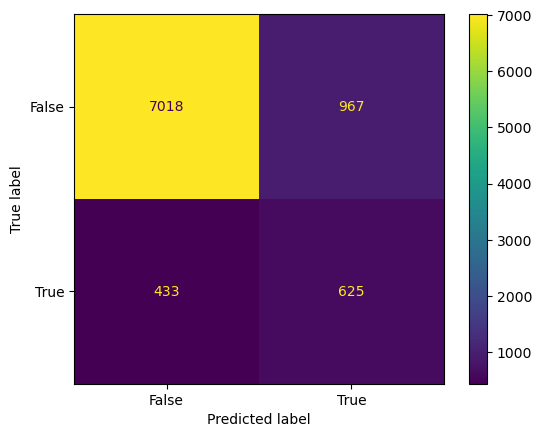

In [30]:
#Confusion Metrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [31]:
# Metrics evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7018  967]
 [ 433  625]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7985
           1       0.39      0.59      0.47      1058

    accuracy                           0.85      9043
   macro avg       0.67      0.73      0.69      9043
weighted avg       0.88      0.85      0.86      9043

